In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
def sigmoid(prediction, rows):
    #this is to reverse the sign and convert from 2d array to 1d for np.exp
    prediction = list(-np.array(prediction).ravel())
    sigmoid = 1 / (1 + np.exp(prediction))
    sigmoid = np.reshape(sigmoid, (-1, rows))#converting back to 2d array
    return sigmoid

In [3]:
def succes_rate(X, theta, y):
    predictions = list(np.dot(X, np.transpose(theta)))
    predictions = np.argmax(predictions, axis=1)
    succes_rate = (y == predictions).astype(int)
    succes_rate = sum(succes_rate)/len(y)
    print("succes rate", succes_rate)

In [4]:
#calculating the Cost with delta modifier to protect from overtraining
def Cost(X, theta, y, delta, rows):
    prediction = sigmoid(np.dot(X, np.transpose(theta)), rows)
    cost = sum(sum( -(y * np.log(prediction)) - (1 - y) * np.log(1 - prediction))/len(y))
    + sum((sum(np.power(theta, 2))) * delta/(2*len(y)))
    return cost

In [5]:
#calculating the Gradient with delta modifier to protect from overtraining
def Gradient(X, theta, y, alfa, delta, rows):
    prediction = sigmoid(np.dot(X, np.transpose(theta)), rows)
    #temp_theta is not to regularize the bias unit 
    temp_theta = theta.copy()
    temp_theta[:, 0] = 0
    
    theta = theta - alfa*(np.dot(np.transpose(prediction-y), X) / len(y) + (delta/len(y) * temp_theta))
    return theta

In [6]:
# importing, changing pandas data to numpy array and shuffling it
iris = pd.read_csv("Iris.csv")
iris_np = iris.to_numpy()
np.random.seed(42)
np.random.shuffle(iris_np)

In [7]:
location_of_name = len(iris_np[0]) - 1 #where the iris names are located

In [8]:
# Changes "iris-name" to numbers from 0 to amount of different names
iris_names = []

for i in range(len(iris_np)):
    has_value = False
    for j in range(len(iris_names)):
        if(iris_names[j] == iris_np[i][location_of_name]):
            iris_np[i][location_of_name] = j
            has_value = True
    if has_value == False:
        iris_names.append(iris_np[i][location_of_name])
        iris_np[i][location_of_name] = len(iris_names) - 1
        has_value = False
number_of_different_names = len(iris_names)

In [9]:
# getting the answers and deleting unnecessary data
iris_y = iris_np[:,location_of_name]
iris_np = np.delete(iris_np, location_of_name, 1)
iris_np = np.delete(iris_np, 0, 1)
iris_np = np.append(np.ones((len(iris_np), 1)), iris_np, axis=1)

In [10]:
# splitting data into training_set 80% and testing_set 20%, setting delta(helps to avoid overfitting)
location_of_name = len(iris_np[0]) - 1
training_ratio = 0.2
delta = 0.1
#iris_np = ComplexVariables(iris_np)            
training_set = iris_np[:int((1-training_ratio) * len(iris_np)),:].copy()
testing_set = iris_np[int((1-training_ratio) * len(iris_np)):,:].copy()
y_train_1d = iris_y[:int((1-training_ratio) * len(iris_np))].copy()
y_test = iris_y[int((1-training_ratio) * len(iris_np)):].copy()
#converting y_train_1d into 2d array with appropriate data representation
y_train = np.zeros((len(y_train_1d),3))
for i in range(len(y_train_1d)):
    y_train[i, y_train_1d[i]] = 1

In [11]:
#generating theta
theta = np.random.rand(number_of_different_names, len(training_set[0]))

In [12]:
#trains for 250 iterations
train_number = 250
cost_count = np.zeros(train_number)
for j in range(train_number):
    theta = Gradient(training_set, theta, y_train, 0.1, delta, number_of_different_names)#0.1 is how big are the steps in gradient descent
    cost_count[j] = Cost(training_set, theta, y_train, delta, number_of_different_names)

In [13]:
# succes rate of training set
succes_rate(training_set ,theta, y_train_1d)

succes rate 0.9333333333333333


In [14]:
# succes rate of testiing set
succes_rate(testing_set ,theta, y_test)

succes rate 1.0


<IPython.core.display.Javascript object>


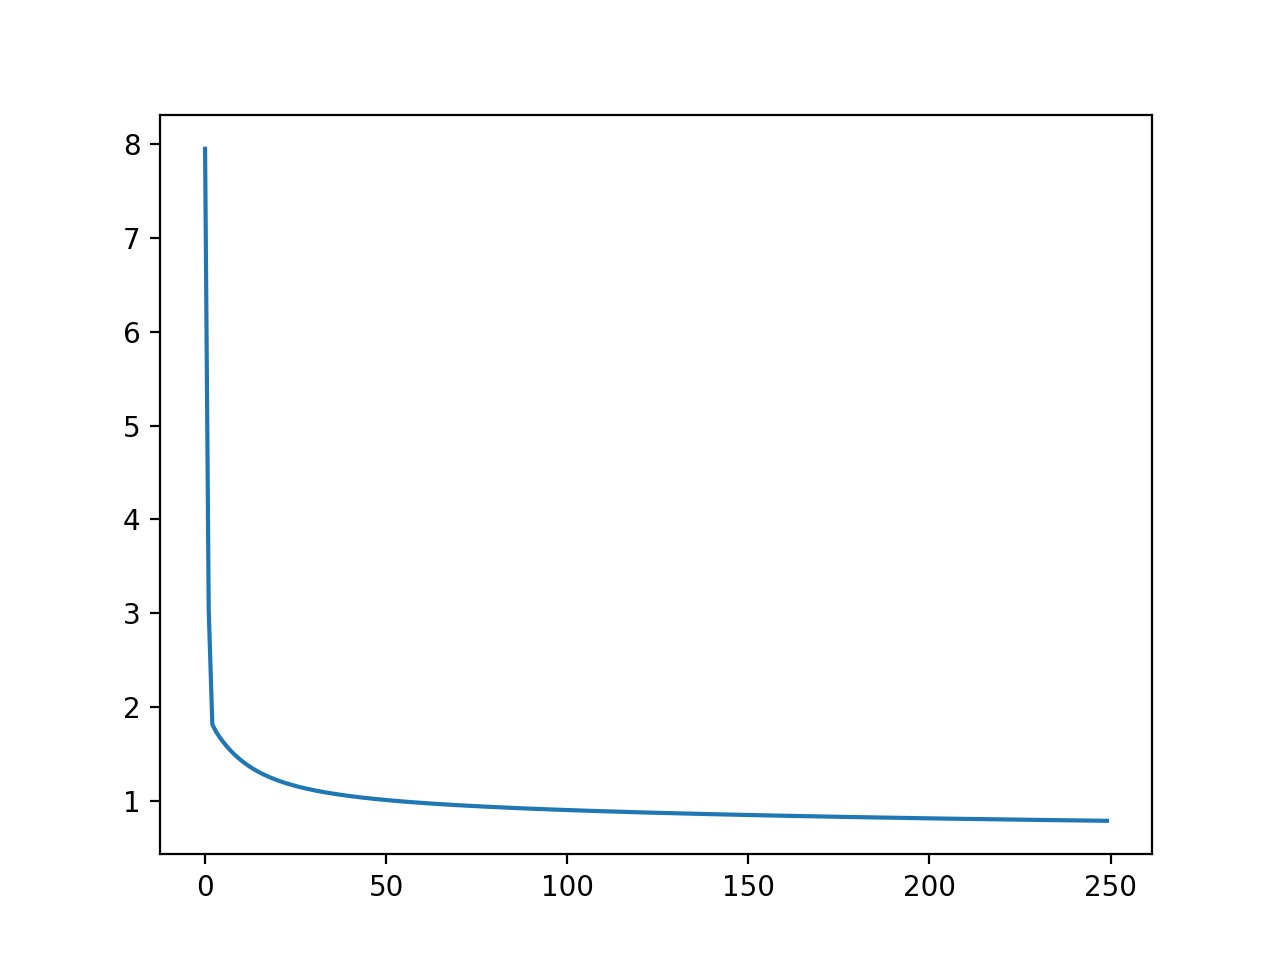

In [15]:
#shows how Cost has changed
plt.plot(cost_count)
plt.show()